## 1.Import and Install dependencies

In [37]:

!pip install --upgrade pip
!pip install mediapipe-model-maker

  Using cached pip-24.3.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-24.3.1-py3-none-any.whl (1.8 MB)


ERROR: To modify pip, please run the following command:
C:\Users\ms526\miniconda3\envs\tensorflowgpu\python.exe -m pip install --upgrade pip


  Using cached mediapipe_model_maker-0.2.1.4-py3-none-any.whl.metadata (1.7 kB)
  Using cached tensorflow_addons-0.22.0-cp310-cp310-win_amd64.whl.metadata (1.8 kB)
  Using cached tensorflow_datasets-4.9.7-py3-none-any.whl.metadata (9.6 kB)
  Using cached tensorflow_hub-0.16.1-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached tensorflow_model_optimization-0.7.5-py2.py3-none-any.whl.metadata (914 bytes)
  Using cached tensorflow_text-2.10.0-cp310-cp310-win_amd64.whl.metadata (2.1 kB)
  Using cached tf_models_official-2.15.0-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached dm_tree-0.1.8-cp310-cp310-win_amd64.whl.metadata (2.0 kB)
  Using cached Cython-3.0.11-cp310-cp310-win_amd64.whl.metadata (3.2 kB)
  Using cached gin_config-0.5.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached google_api_python_client-2.155.0-py2.py3-none-any.whl.metadata (6.7 kB)
  Using cached immutabledict-4.2.1-py3-none-any.whl.metadata (3.5

  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [48 lines of output]
  running egg_info
  writing lib3\PyYAML.egg-info\PKG-INFO
  writing dependency_links to lib3\PyYAML.egg-info\dependency_links.txt
  writing top-level names to lib3\PyYAML.egg-info\top_level.txt
  Traceback (most recent call last):
    File "C:\Users\ms526\miniconda3\envs\tensorflowgpu\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\ms526\miniconda3\envs\tensorflowgpu\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
    File "C:\Users\ms526\miniconda3\envs\tensorflowgpu\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
      return hook(config_settings)
    File "C:\Users\ms526\AppData\Local\Tem

In [38]:
 # Use this to upload the kaggle.json file
import os
import tensorflow as tf
assert tf.__version__.startswith('2')

from mediapipe.model_maker.models import gesture_recognizer

import matplotlib.pyplot as plt

In [39]:
dataset_path = "ISL_Dataset"

In [40]:
print(dataset_path)
labels = []
for i in os.listdir(dataset_path):
  if os.path.isdir(os.path.join(dataset_path, i)):
    if i == '.ipynb_checkpoints' :
      continue
    labels.append(i)
print(labels)

ISL-Dataset
['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


C:\Users\ms526\AppData\Local\Temp\ipykernel_6596\3802573452.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1, NUM_EXAMPLES, figsize=(10,2))


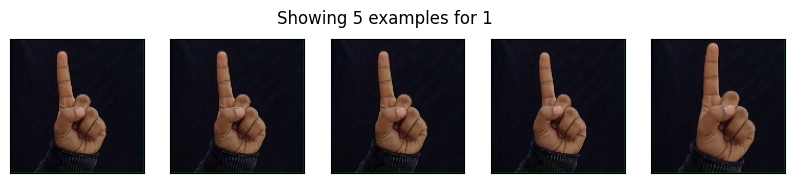

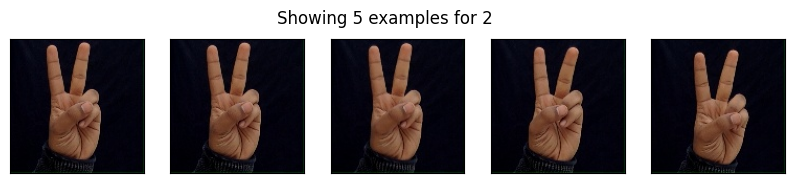

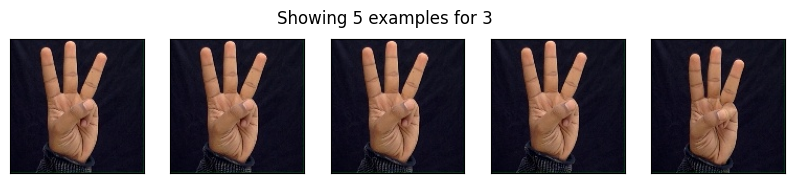

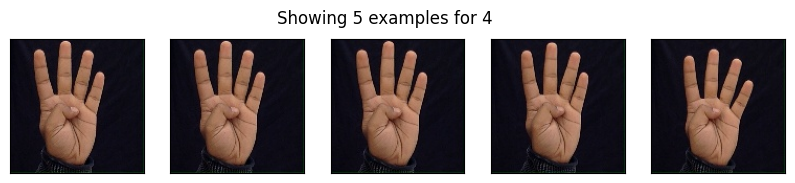

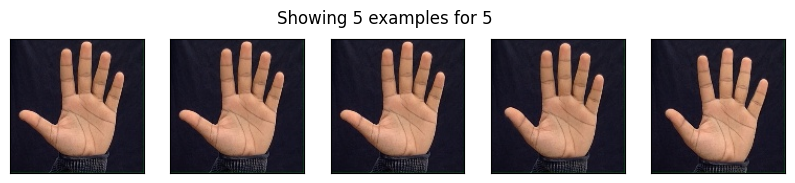

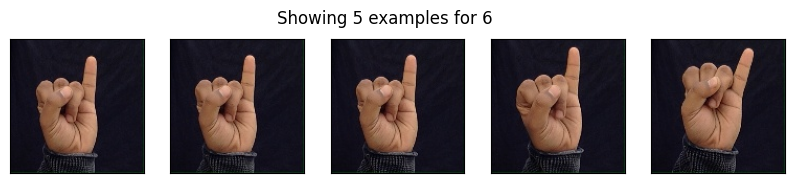

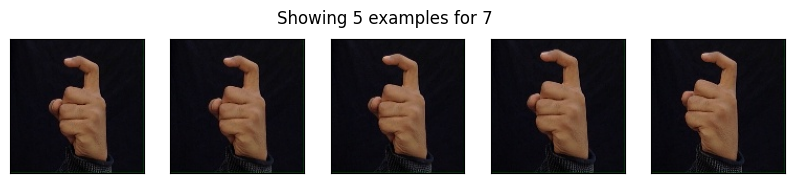

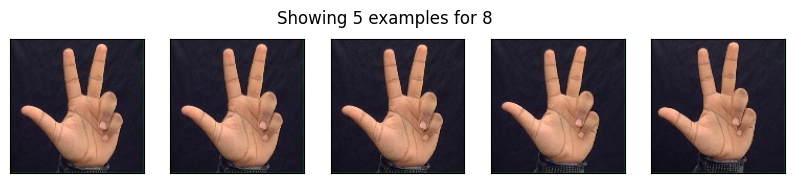

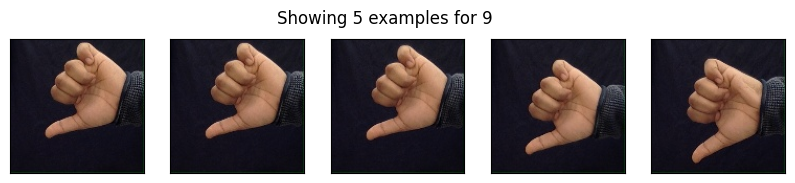

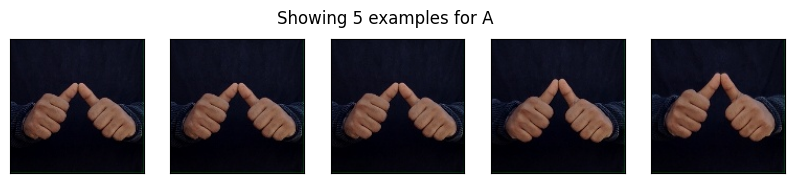

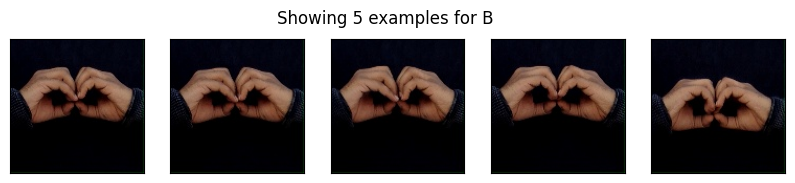

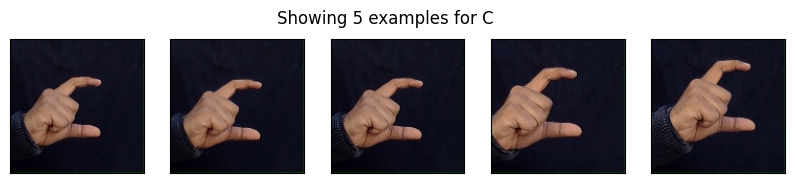

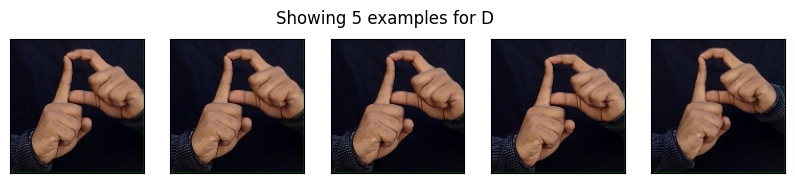

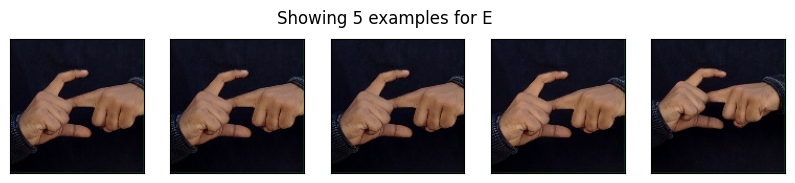

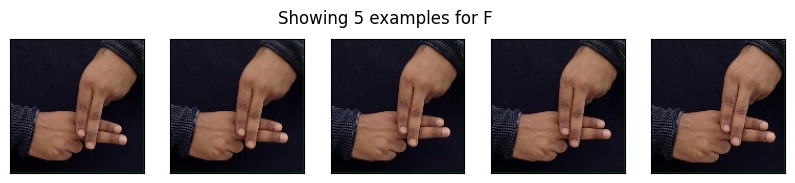

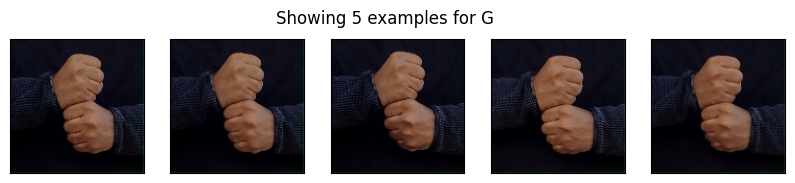

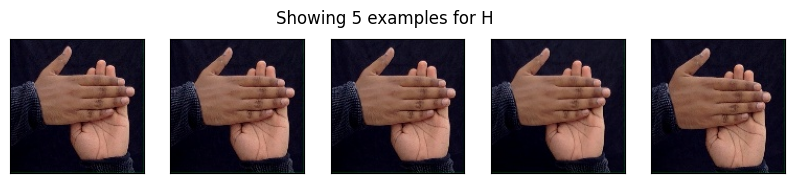

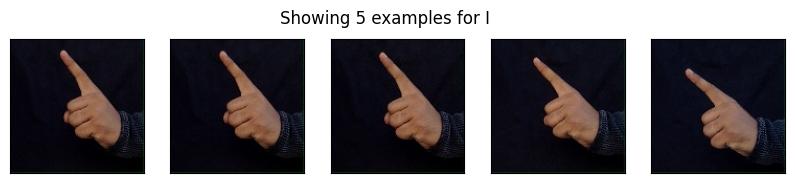

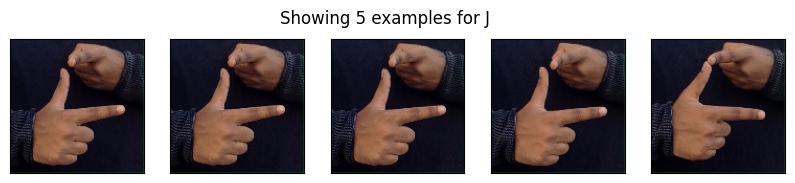

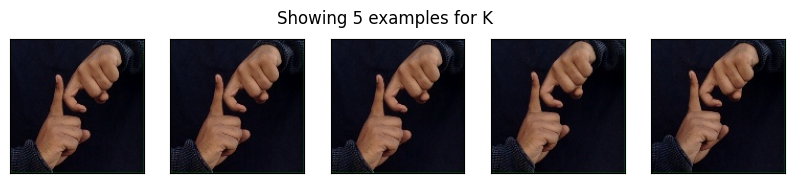

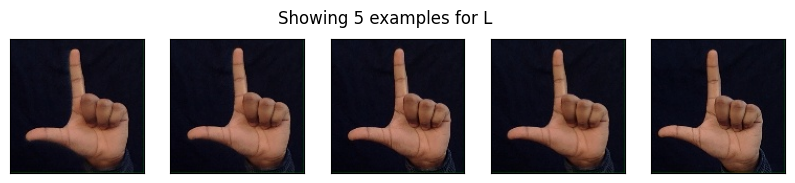

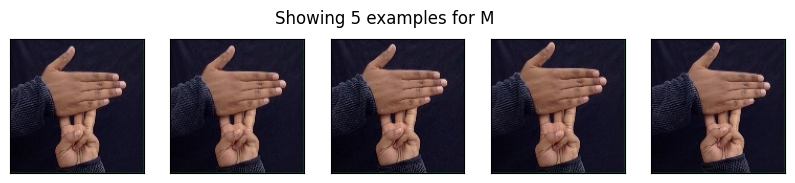

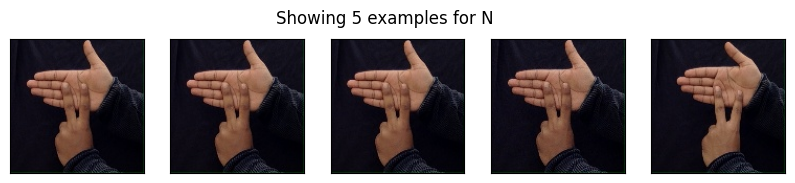

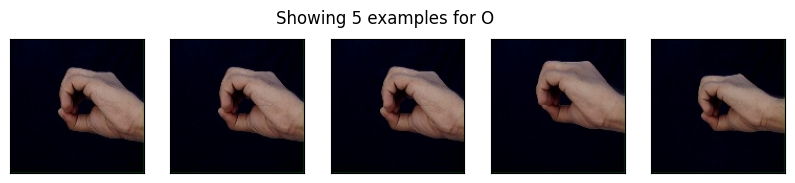

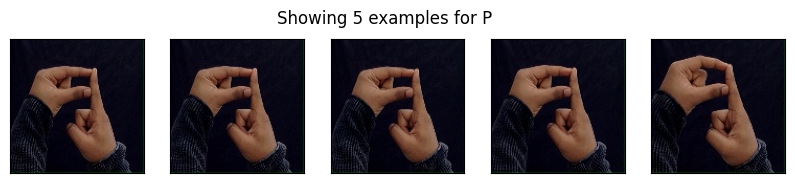

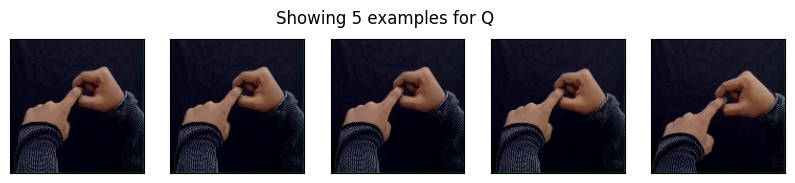

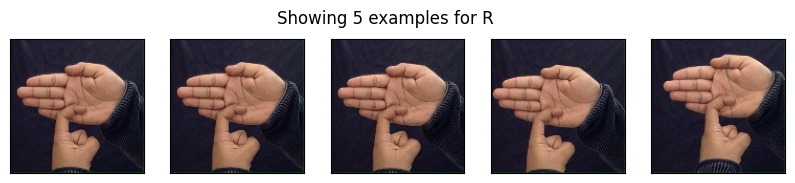

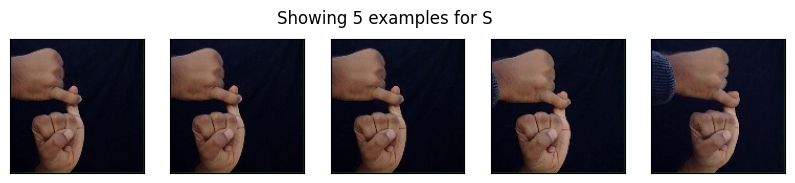

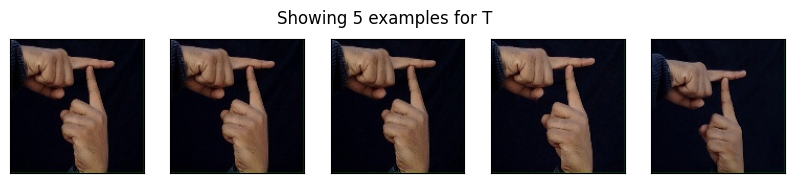

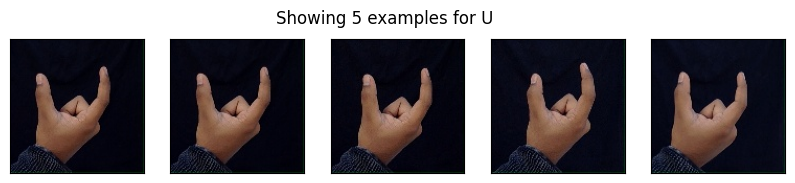

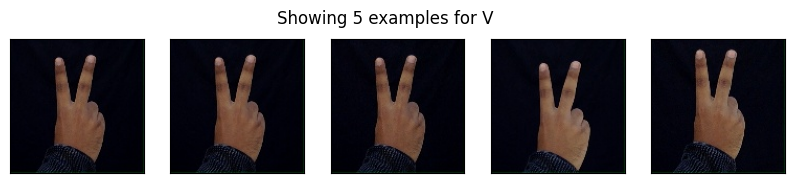

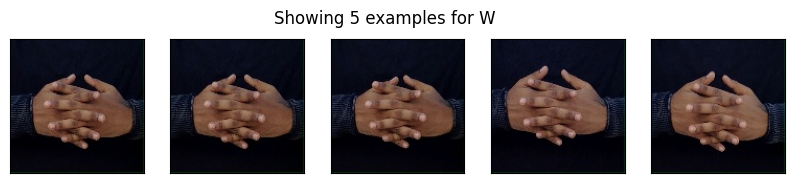

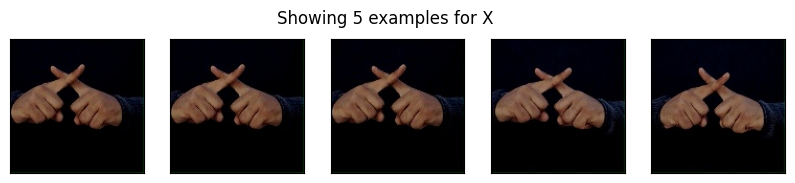

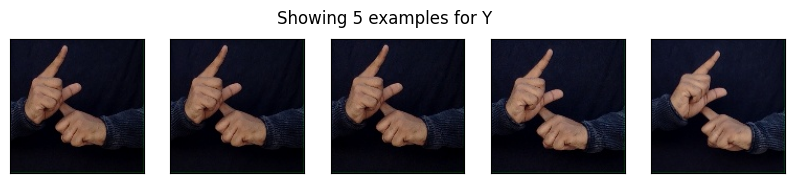

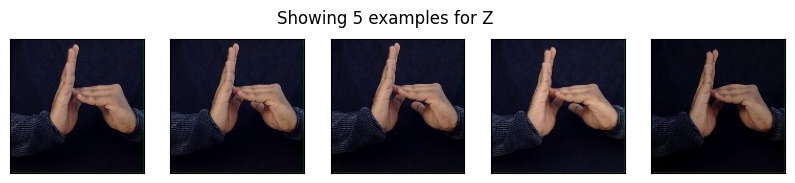

In [41]:
NUM_EXAMPLES = 5

for label in labels:
  label_dir = os.path.join(dataset_path, label)
  example_filenames = os.listdir(label_dir)[:NUM_EXAMPLES]
  fig, axs = plt.subplots(1, NUM_EXAMPLES, figsize=(10,2))
  for i in range(NUM_EXAMPLES):
    axs[i].imshow(plt.imread(os.path.join(label_dir, example_filenames[i])))
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
  fig.suptitle(f'Showing {NUM_EXAMPLES} examples for {label}')

plt.show()

In [42]:
plt.close(fig)

In [45]:
data = gesture_recognizer(
    dirname=dataset_path,
    hparams=gesture_recognizer.HandDataPreprocessingParams()
)
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

AttributeError: module 'mediapipe.model_maker.models.gesture_recognizer' has no attribute 'HandDataPreprocessingParams'

In [ ]:
hparams = gesture_recognizer.HParams(epochs=100, export_dir="exported_model")
options = gesture_recognizer.GestureRecognizerOptions(hparams=hparams)
model = gesture_recognizer.GestureRecognizer.create(
    train_data=train_data,
    validation_data=validation_data,
    options=options
)

In [28]:
import cv2
import math

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480

def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)


# Preview the images.
images = {name: cv2.imread(name) for name in IMAGE_FILENAMES}
for name, image in images.items():
  print(name)
  resize_and_show(image)

ModuleNotFoundError: No module named 'google.colab'

In [29]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2

cap = cv2.VideoCapture(0)

# STEP 2: Create an GestureRecognizer object.
base_options = python.BaseOptions(model_asset_path='isl_recognizer.task')
options = vision.GestureRecognizerOptions(base_options=base_options)
recognizer = vision.GestureRecognizer.create_from_options(options)

images = []
results = []
while True :
    # STEP 3: Load the input image.
    image = mp.Image.create_from_file(cap)

    # STEP 4: Recognize gestures in the input image.
    recognition_result = recognizer.recognize(image)

    # STEP 5: Process the result. In this case, visualize it.
    images.append(image)
    top_gesture = recognition_result.gestures[0][0]
    hand_landmarks = recognition_result.hand_landmarks
    results.append((top_gesture, hand_landmarks))

    cv2.imshow('feed',results)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

TypeError: create_from_file(): incompatible function arguments. The following argument types are supported:
    1. (file_name: str) -> mediapipe.python._framework_bindings.image.Image

Invoked with: < cv2.VideoCapture 000001F3E39B1210>

### ISL reogintion runner by chat gpt

In [30]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import numpy as np

# STEP 2: Initialize the GestureRecognizer object.
base_options = python.BaseOptions(model_asset_path="isl_recognizer.task")
options = vision.GestureRecognizerOptions(base_options=base_options)
recognizer = vision.GestureRecognizer.create_from_options(options)

# Open the webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Cannot access the webcam")
    exit()

while True:
    # Read a frame from the webcam
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to capture frame")
        break

    # Convert the frame to RGB (required by MediaPipe)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Convert the frame to MediaPipe Image
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame_rgb)

    # STEP 4: Recognize gestures in the input image.
    recognition_result = recognizer.recognize(mp_image)

    # STEP 5: Process and visualize the result.
    if recognition_result.gestures:
        top_gesture = recognition_result.gestures[0][0]
        gesture_name = top_gesture.category_name
        gesture_score = top_gesture.score

        # Display the gesture name and score on the frame
        cv2.putText(
            frame,
            f"Gesture: {gesture_name} ({gesture_score:.2f})",
            (10, 50),
            cv2.FONT_HERSHEY_SIMPLEX,
            1,
            (0, 255, 0),
            2,
        )

    # Display the frame
    cv2.imshow("Gesture Recognition", frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


## 2.Keypoints using MP Holistic

In [ ]:
mp_holistic = mp.solutions.holistic  #holistic
mp_drawing = mp.solutions.drawing_utils  #drawing utilites

In [ ]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  #COLOR CONVERSION BGR TO RGB
    image.flags.writeable = False                   #Image is no loger writable
    results = model.process(image)                  #Make Prediction
    image.flags.writeable = True                    #Image is now writable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  #COLOR CONVERSION RGB TO BGR
    return image, results

In [ ]:
def draw_landmark(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)  #Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)  #Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #Draw right hand connections

In [ ]:
def draw_styled_landmark(image, results):
    #Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
    #Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))
    #Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=2),
                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))
    #Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

In [ ]:
##
mp_drawing.draw_landmarks??

In [ ]:
cap=cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        #Read feed
        ret, frame= cap.read()

        #Make detection
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        #Draw Lanmarks
        draw_styled_landmark(image, results)

        #Show to screeen
        cv2.imshow('Opencv Feed',image)

        #Break gracefully
        if cv2.waitKey(10) & 0xFF==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
draw_styled_landmark(frame, results)

In [ ]:
frame

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

## 3. Extract keypoints

In [ ]:
[len(results.pose_landmarks.landmark), len(results.face_landmarks.landmark), len(results.right_hand_landmarks.landmark)]

In [ ]:
results.pose_landmarks.landmark[0]

In [ ]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)
pose = np.array(pose).flatten() #Converting list to np array and flatten also

In [ ]:
#Error handeling (when no hand in frame)
lh = []
if results.left_hand_landmarks: 
    for res in results.left_hand_landmarks.landmark:
        test = np.array([res.x, res.y, res.z])
        lh.append(test)
    lh = np.array(lh).flatten()
else:
    lh = np.zeros(21*3)

In [ ]:
##
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [ ]:
rh

In [ ]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [ ]:
result_test = extract_keypoints(results)

In [ ]:
result_test.shape

In [ ]:
33*4+468*3+21*3+21*3

## 4. Setup folder for Data collection

In [ ]:
# Path for exported data, numpy arrays (floder for saving data)
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect (folder for each class name)
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data (no. of videos in each class and making a folder for each video)
no_sequences = 30

# Videos are going to be 30 frames in length (no. fo frames in each video)
sequence_length = 30

In [ ]:
#MP Data
    #hello
        #1
            #1-30
        #2
            #1-30
        ....
        #30
            #1-30
    #thanks

In [ ]:
for action in actions: 
    for sequence in range(0, no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

## 5. Collect Keypoints value for Training and testing

In [ ]:
cap=cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range (no_sequences):
            for frame_num in range (sequence_length):
                #Read feed
                ret, frame= cap.read()
        
                #Make detection
                image, results = mediapipe_detection(frame, holistic)
                print(results)
        
                #Draw Lanmarks
                draw_styled_landmark(image, results)

                if frame_num == 0:
                    cv2.putText(image,'STARRTING COLLECTION',(120,200),
                                cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),3,cv2.LINE_AA)
                    cv2.putText(image,'COLLECTING FRAMES FOR:{} VIDEO NO:{}'.format(action,sequence),(15,20),
                                cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('Opencv Feed',image)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image,'COLLECTING FRAMES FOR:{} VIDEO NO:{}'.format(action,sequence),(15,20),
                                cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('Opencv Feed',image)
        
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                #Break gracefully
                if cv2.waitKey(10) & 0xFF==ord('q'):
                    cap.release()
                    cv2.destroyAllWindows()
                    
cap.release()
cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

## 6. Preprocess Data and Create Labels and Features

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
label_map = {label:num for num, label in enumerate(actions)}

In [ ]:
list(enumerate(actions))

In [ ]:
label_map

In [ ]:
sequences, labels = [], []
for action in actions:
    for sequence in range (no_sequences):
        window =[]
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [ ]:
np.array(sequences).shape

In [ ]:
np.array(labels).shape

In [ ]:
x = np.array(sequences)

In [ ]:
x.shape

In [ ]:
y = to_categorical(labels).astype(int)

In [ ]:
y

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)

In [ ]:
y_test.shape

## 7. Build and Train LSTM Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
res=[0.2, 0.7, 0.1]

In [ ]:
actions[np.argmax(res)]

In [ ]:
model.fit(x_train, y_train, epochs=2000, callbacks=[tb_callback])

In [ ]:
model.summary()

## 8. Make Predictions

In [ ]:
res = model.predict(x_test)

In [ ]:
actions[np.argmax(res[4])]

In [ ]:
actions[np.argmax(y_test[4])]

## 9. Save the Weights

In [ ]:
model.save('action1.h5')

In [ ]:
del model

In [ ]:
model.load_weights('action2.h5')

## 10. Evaluating using Confusion Matrix and Accuracy

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(x_test)

In [ ]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

In [ ]:
accuracy_score(ytrue, yhat)

## 11. Test in Real time

In [ ]:
def draw_styled_landmark(image, results):
    #Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
    #Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))
    #Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=2),
                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))
    #Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

In [ ]:
from scipy import stats

In [ ]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.7

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmark(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        # sequence.insert(0,keypoints)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()